# 杭州萧山区项目
## 本地排放清单与MEIC比较
## `Compare local emis with MEIC`

---
*@author: Evan*\
*@date: 2023-07-21*

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import os

# silence the warning note
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
from matplotlib import rcParams
config = {
    "font.family":'Times New Roman',
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)

import sys
sys.path.append('../../src/')
from namelist import *

In [2]:
meic = pd.read_excel(datadir + 'Local_emis_2020/preliminary_emis/count_emission.xlsx',sheet_name='MEIC',index_col=0)
meic

,SO2,NOx,CO,PM10,PM25,VOCs,NH3,BC,OC
Sectors,,,,,,,,,
Industry,6303.86,22851.1,90999.2,10172.62,6661.79,94870.49,125.4,539.83,471.50
Transportation,225.74,13231.7,70305.0,1267.92,1252.99,12897.19,151.6,387.17,156.07
Power,1034.66,4620.6,3179.8,38.15,26.58,59.89,0.0,0.05,0.00
Residential,216.04,264.9,7057.9,812.18,760.17,2922.62,200.0,82.66,258.78
Agriculture,0.00,0.0,0.0,0.00,0.00,0.00,2892.1,0.00,0.00


# 绝对值

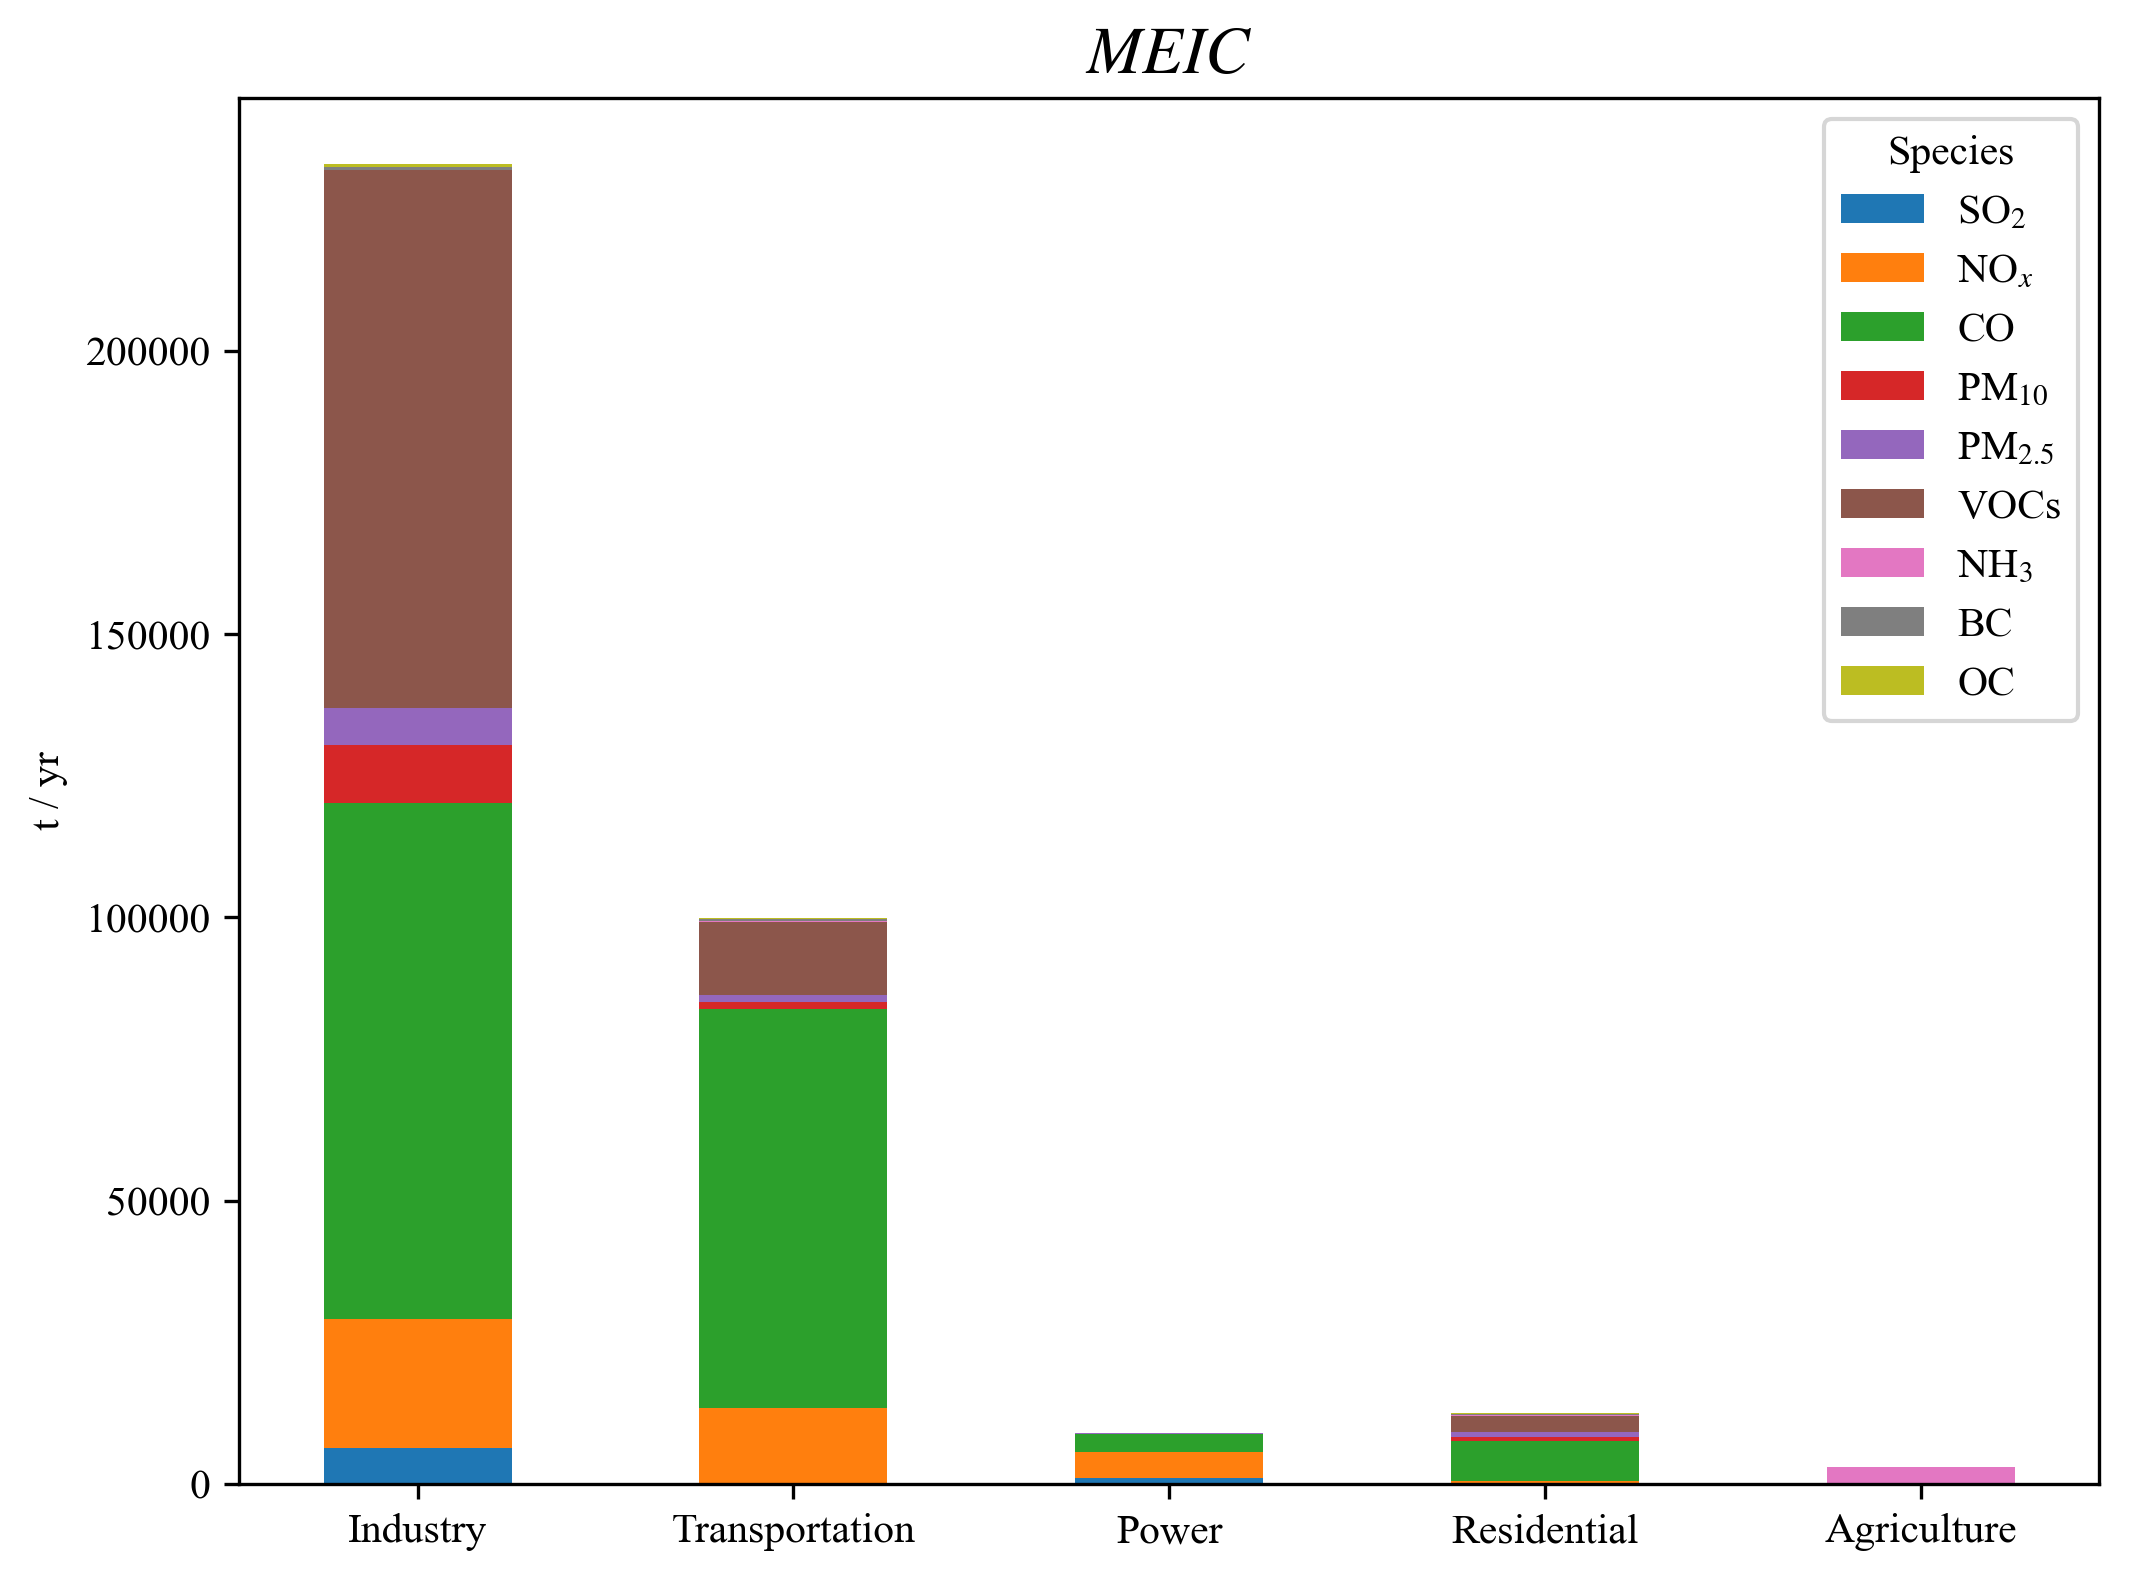

In [3]:
fig = plt.figure(figsize=(8,6),dpi=300)
ax = fig.subplots(1,1)

meic_copy = meic.copy()
bottom = [0] * len(meic.index) # None
labels = ['SO$_2$','NO$_x$','CO','PM$_{10}$','PM$_{2.5}$','VOCs','NH$_3$','BC','OC']

# 循环绘制每个污染物的柱状图
for i, col in enumerate(meic_copy.columns):
    if bottom is None:
        ax.bar(meic_copy.index, meic_copy[col], width=0.5, label=labels[i], align='center', alpha=1)
        bottom = meic_copy[col]
    else:
        ax.bar(meic_copy.index, meic_copy[col], width=0.5, bottom=bottom, label=labels[i], align='center', alpha=1)
        bottom += meic_copy[col]
ax.legend(title='Species')
ax.set_ylabel('t / yr')
ax.set_title('$MEIC$',size=16,weight='bold')
plt.show()

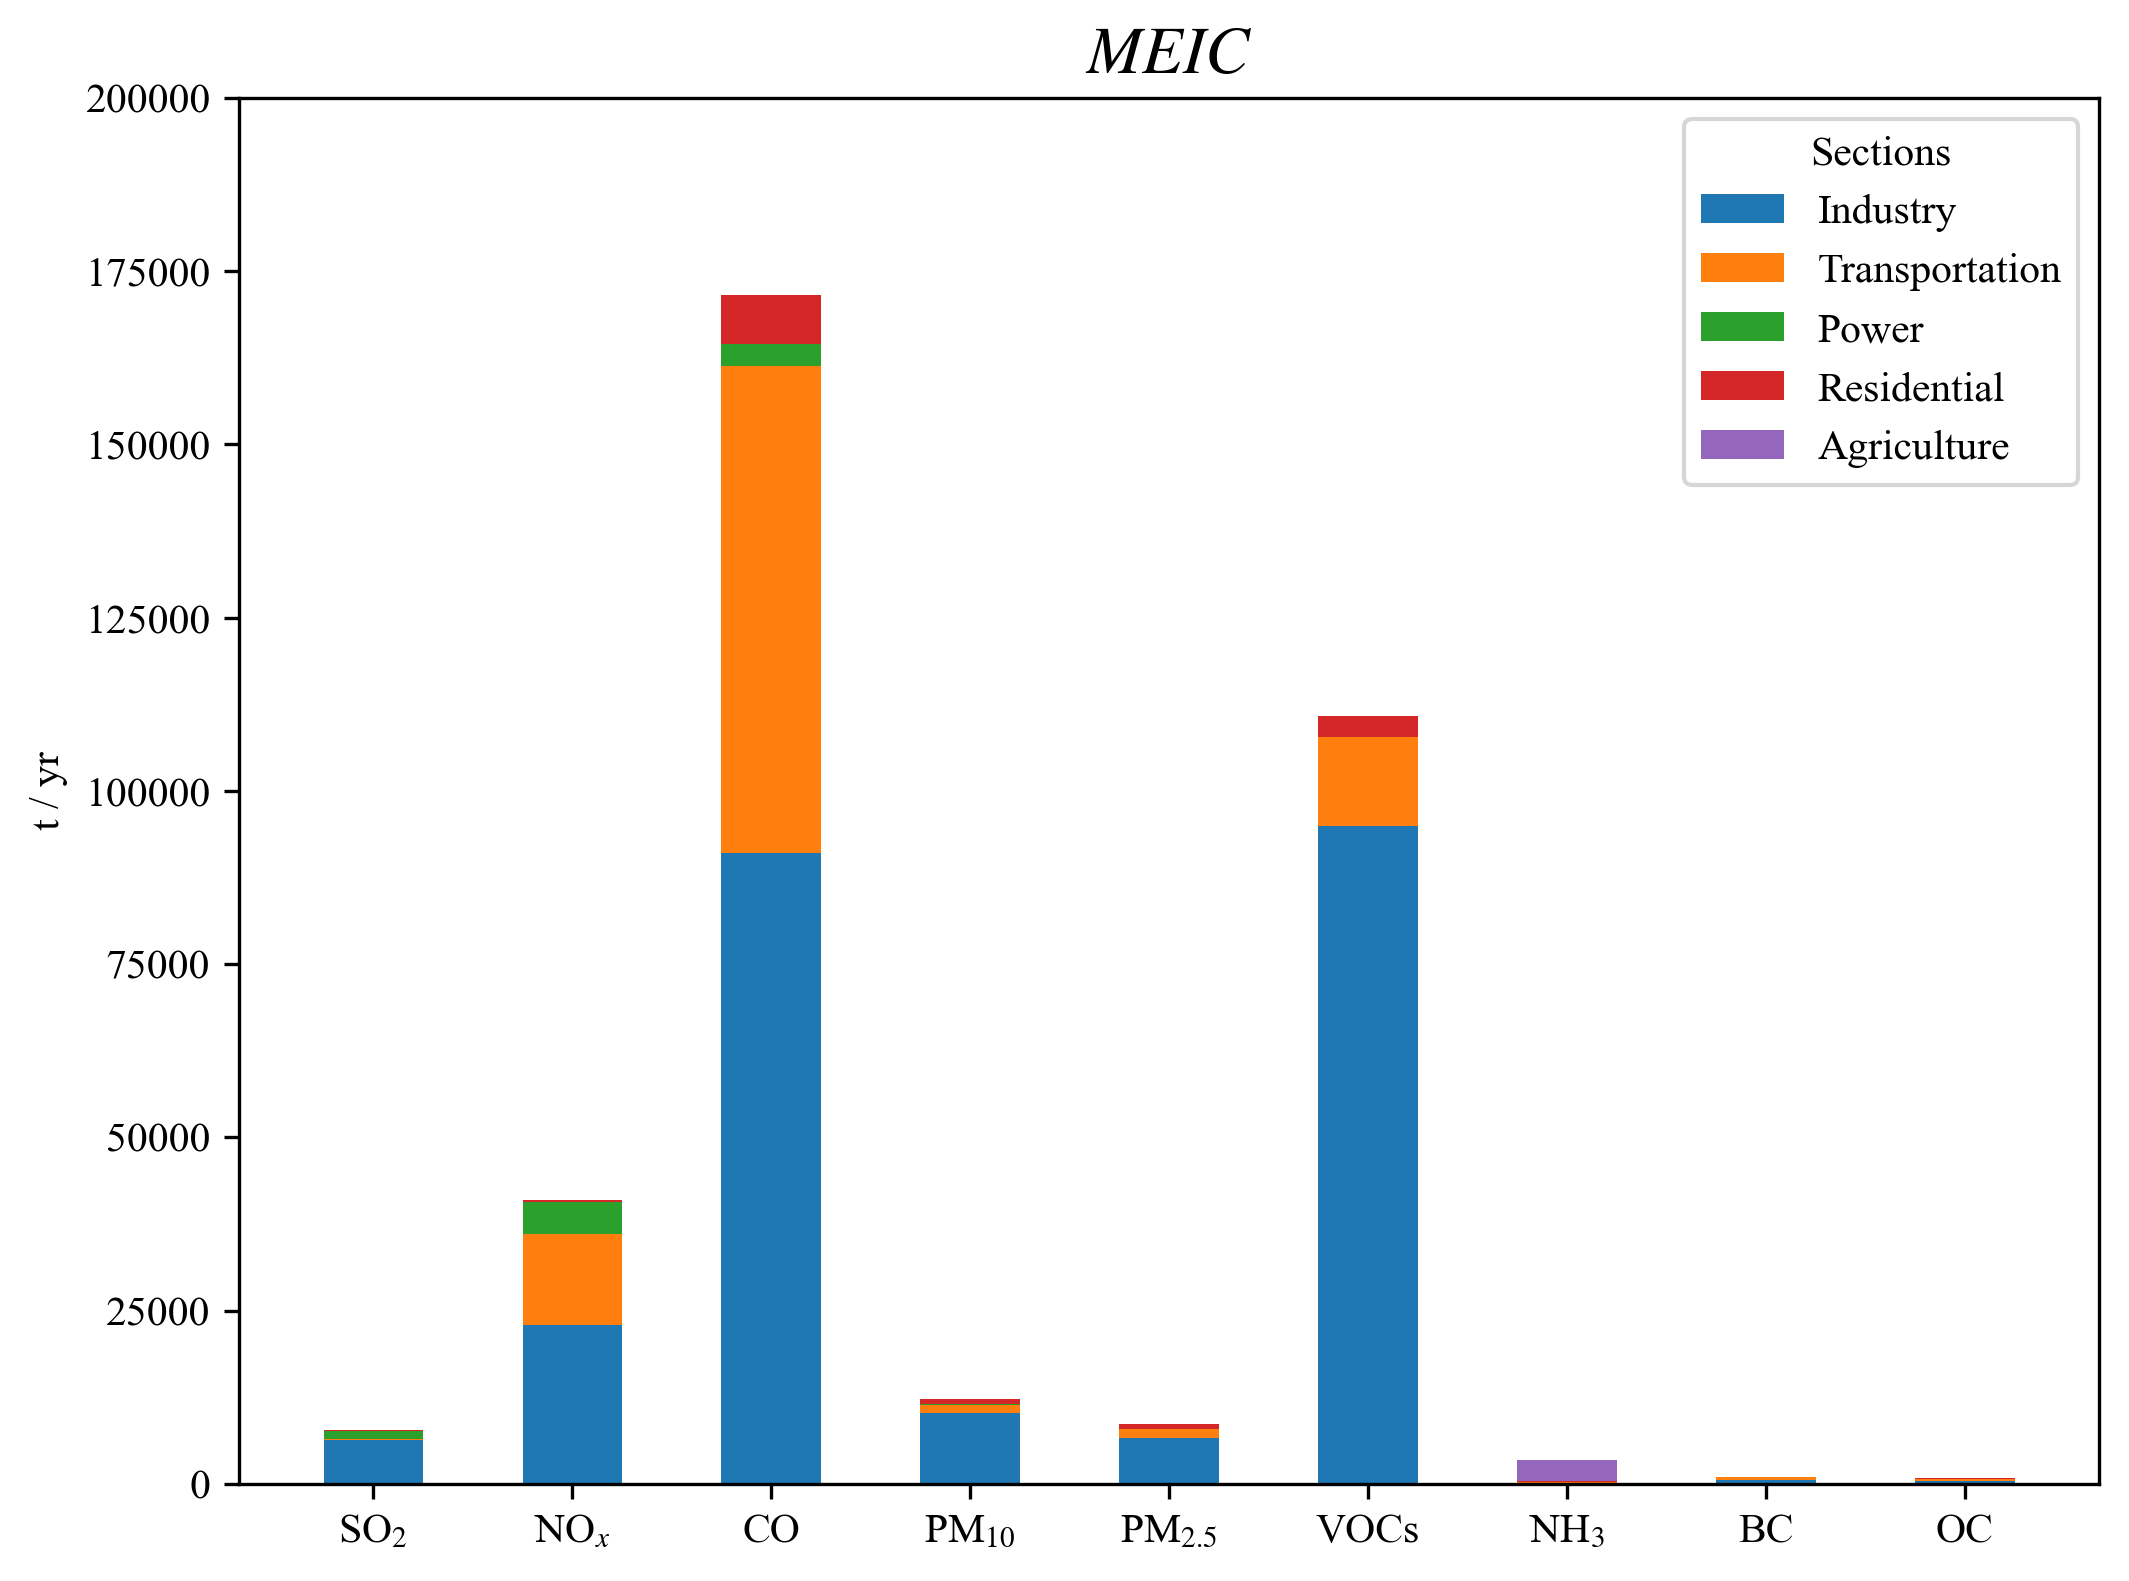

In [4]:
fig = plt.figure(figsize=(8,6),dpi=300)
ax = fig.subplots(1,1)

meicT = meic.T
meicT.index = ['SO$_2$','NO$_x$','CO','PM$_{10}$','PM$_{2.5}$','VOCs','NH$_3$','BC','OC']
meicT_copy = meicT.copy()
bottom = [0] * len(meicT.index) # None
labels = ['Industry', 'Transportation', 'Power', 'Residential', 'Agriculture']

# 循环绘制每个污染物的柱状图
for i, col in enumerate(meicT_copy.columns):
    if bottom is None:
        ax.bar(meicT_copy.index, meicT_copy[col], width=0.5, label=labels[i], align='center', alpha=1)
        bottom = meicT_copy[col]
    else:
        ax.bar(meicT_copy.index, meicT_copy[col], width=0.5, bottom=bottom, label=labels[i], align='center', alpha=1)
        bottom += meicT_copy[col]
ax.legend(title='Sections')
ax.set_ylabel('t / yr')
ax.set_title('$MEIC$',size=16,weight='bold')

ax.set_ylim(0,200000)

plt.show()

# 占比

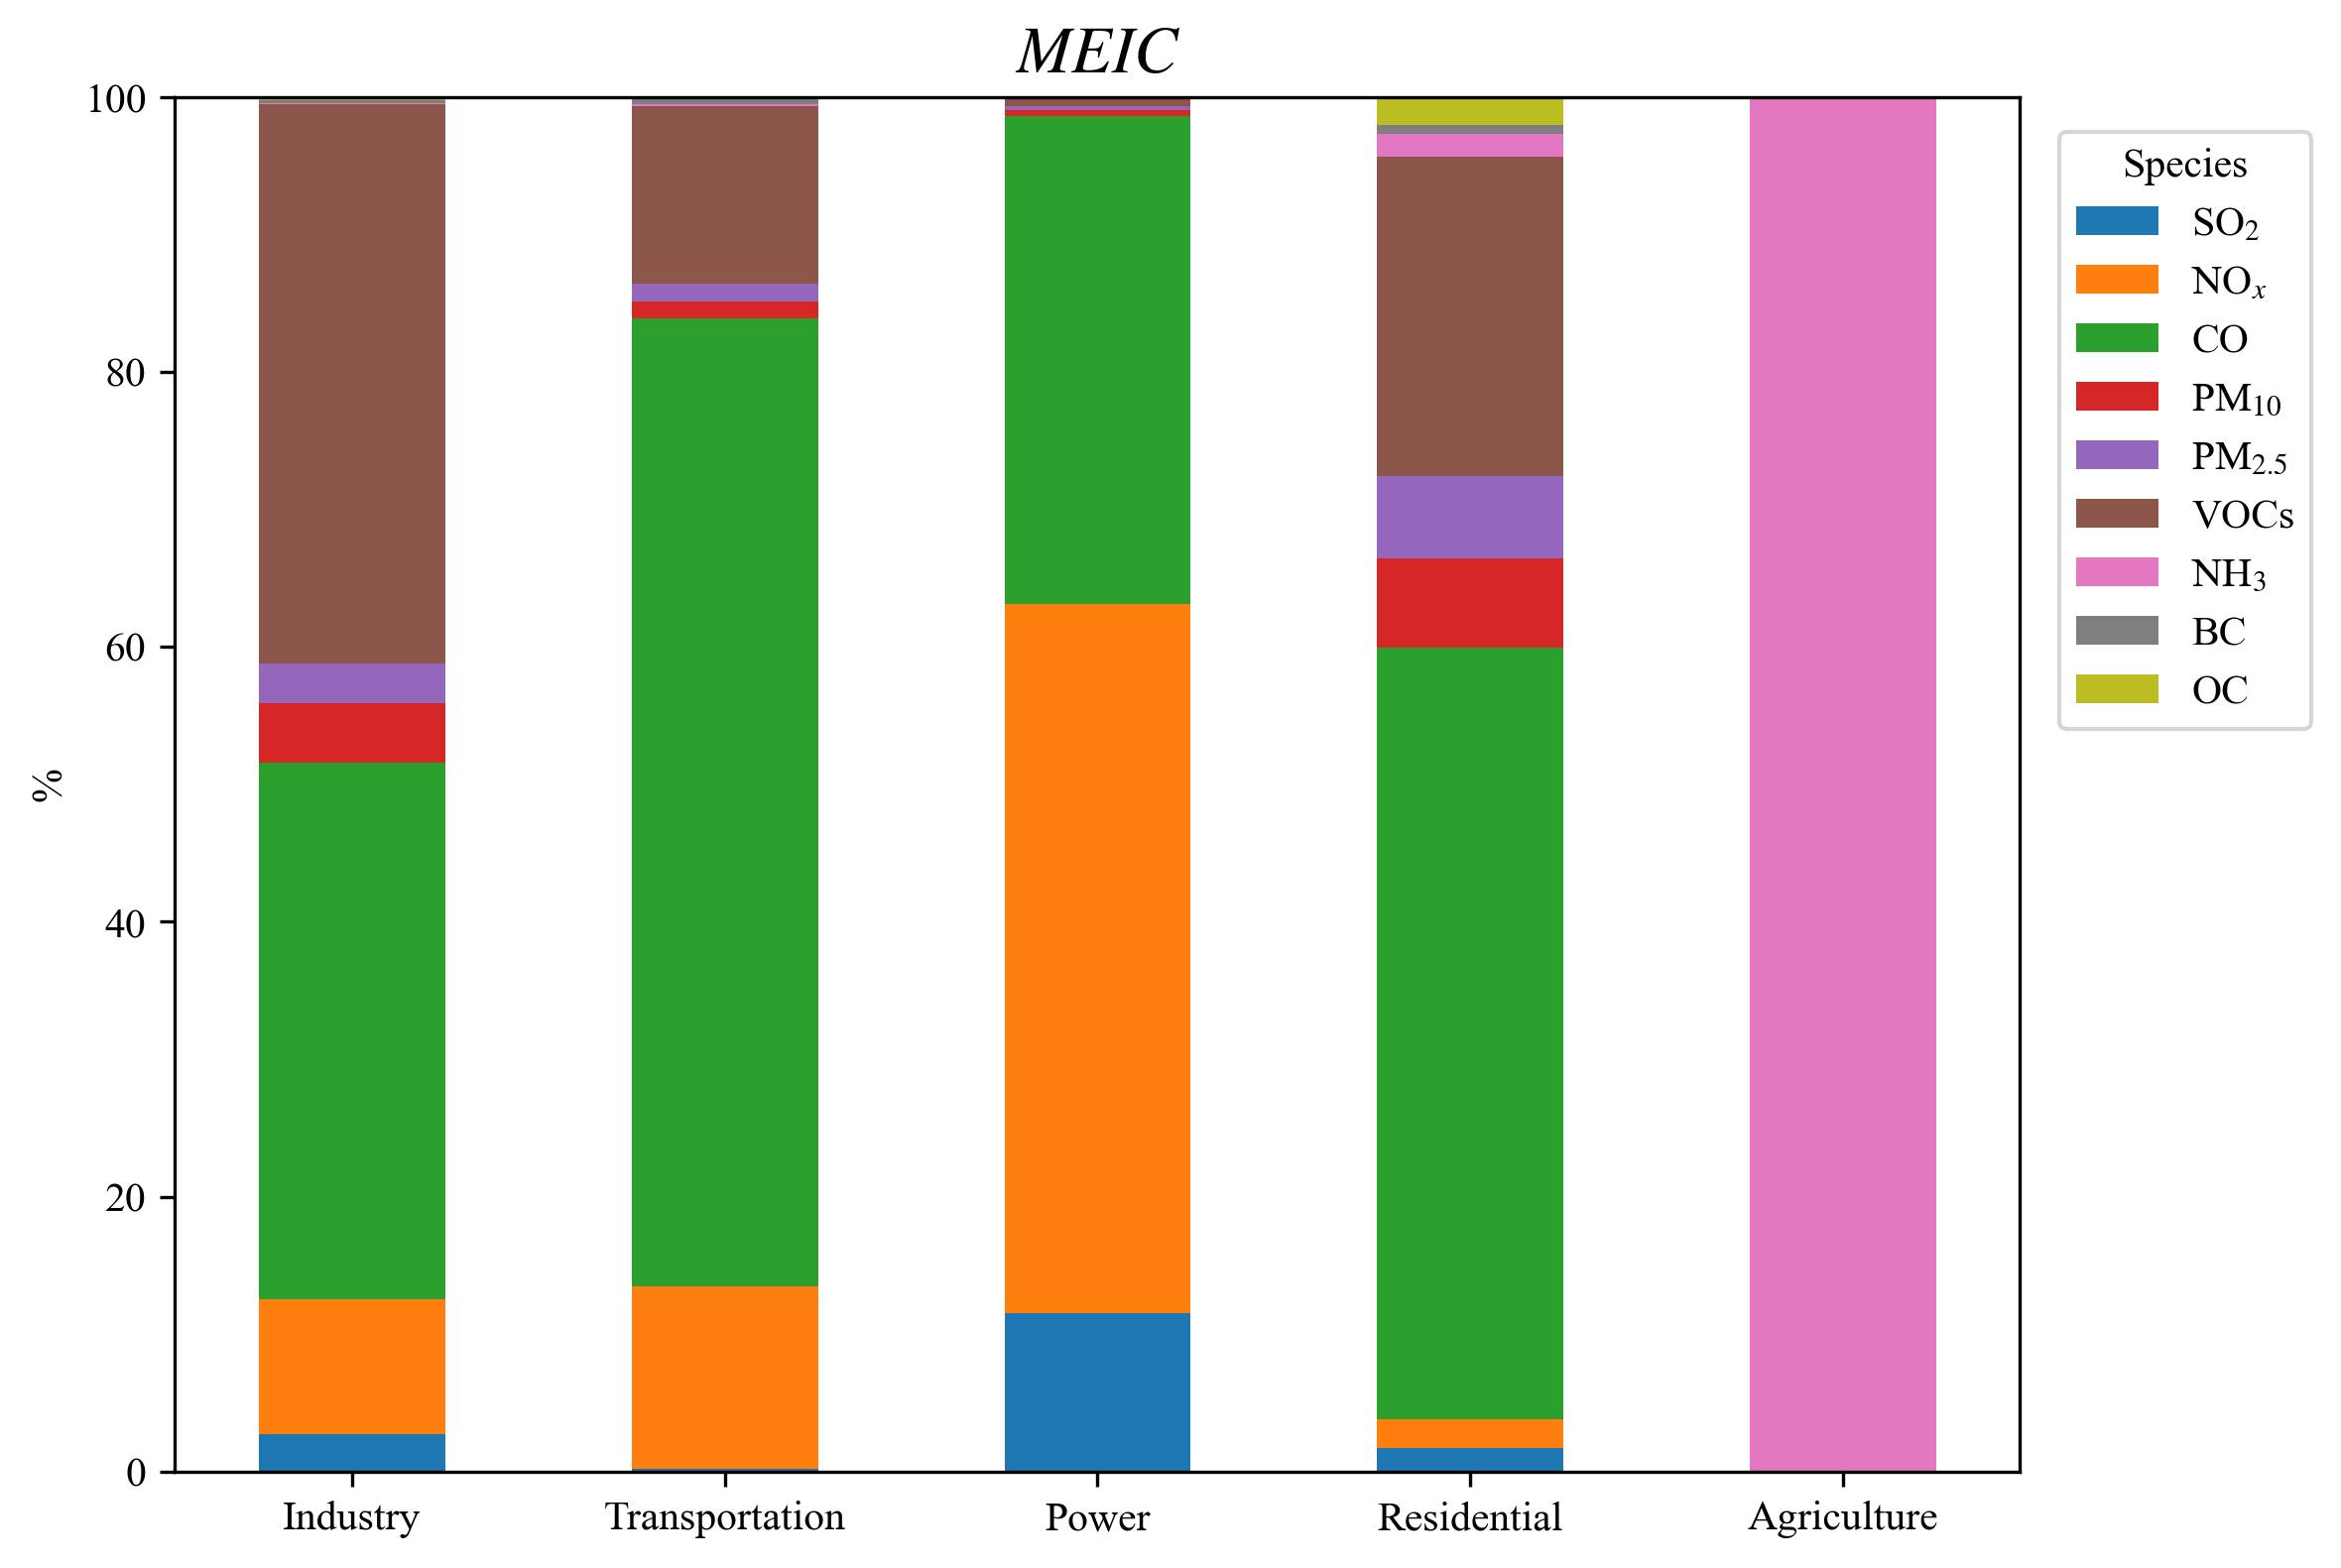

In [5]:
fig = plt.figure(figsize=(8, 6), dpi=300)
ax = fig.subplots(1, 1)

meic_copy = meic.copy()

# Calculate the total sum for each category
total_sum = meic_copy.sum(axis=1)

# Convert the values to percentage for each pollutant
for col in meic_copy.columns:
    meic_copy[col] = (meic_copy[col] / total_sum) * 100

bottom = [0] * len(meic.index)  # Initialize bottom

labels = ['SO$_2$', 'NO$_x$', 'CO', 'PM$_{10}$', 'PM$_{2.5}$', 'VOCs', 'NH$_3$', 'BC', 'OC']

# Loop through each pollutant and plot the stacked bar chart
for i, col in enumerate(meic_copy.columns):
    if bottom is None:
        ax.bar(meic_copy.index, meic_copy[col], width=0.5, label=labels[i], align='center', alpha=1)
        bottom = meic_copy[col]
    else:
        ax.bar(meic_copy.index, meic_copy[col], width=0.5, bottom=bottom, label=labels[i], align='center', alpha=1)
        bottom += meic_copy[col]

ax.legend(title='Species',bbox_to_anchor=(1.01,0.99))
ax.set_ylabel('%')
ax.set_title('$MEIC$', size=16, weight='bold')
ax.set_ylim(0, 100)  # Set the y-axis range to 0-100 (%)
plt.show()


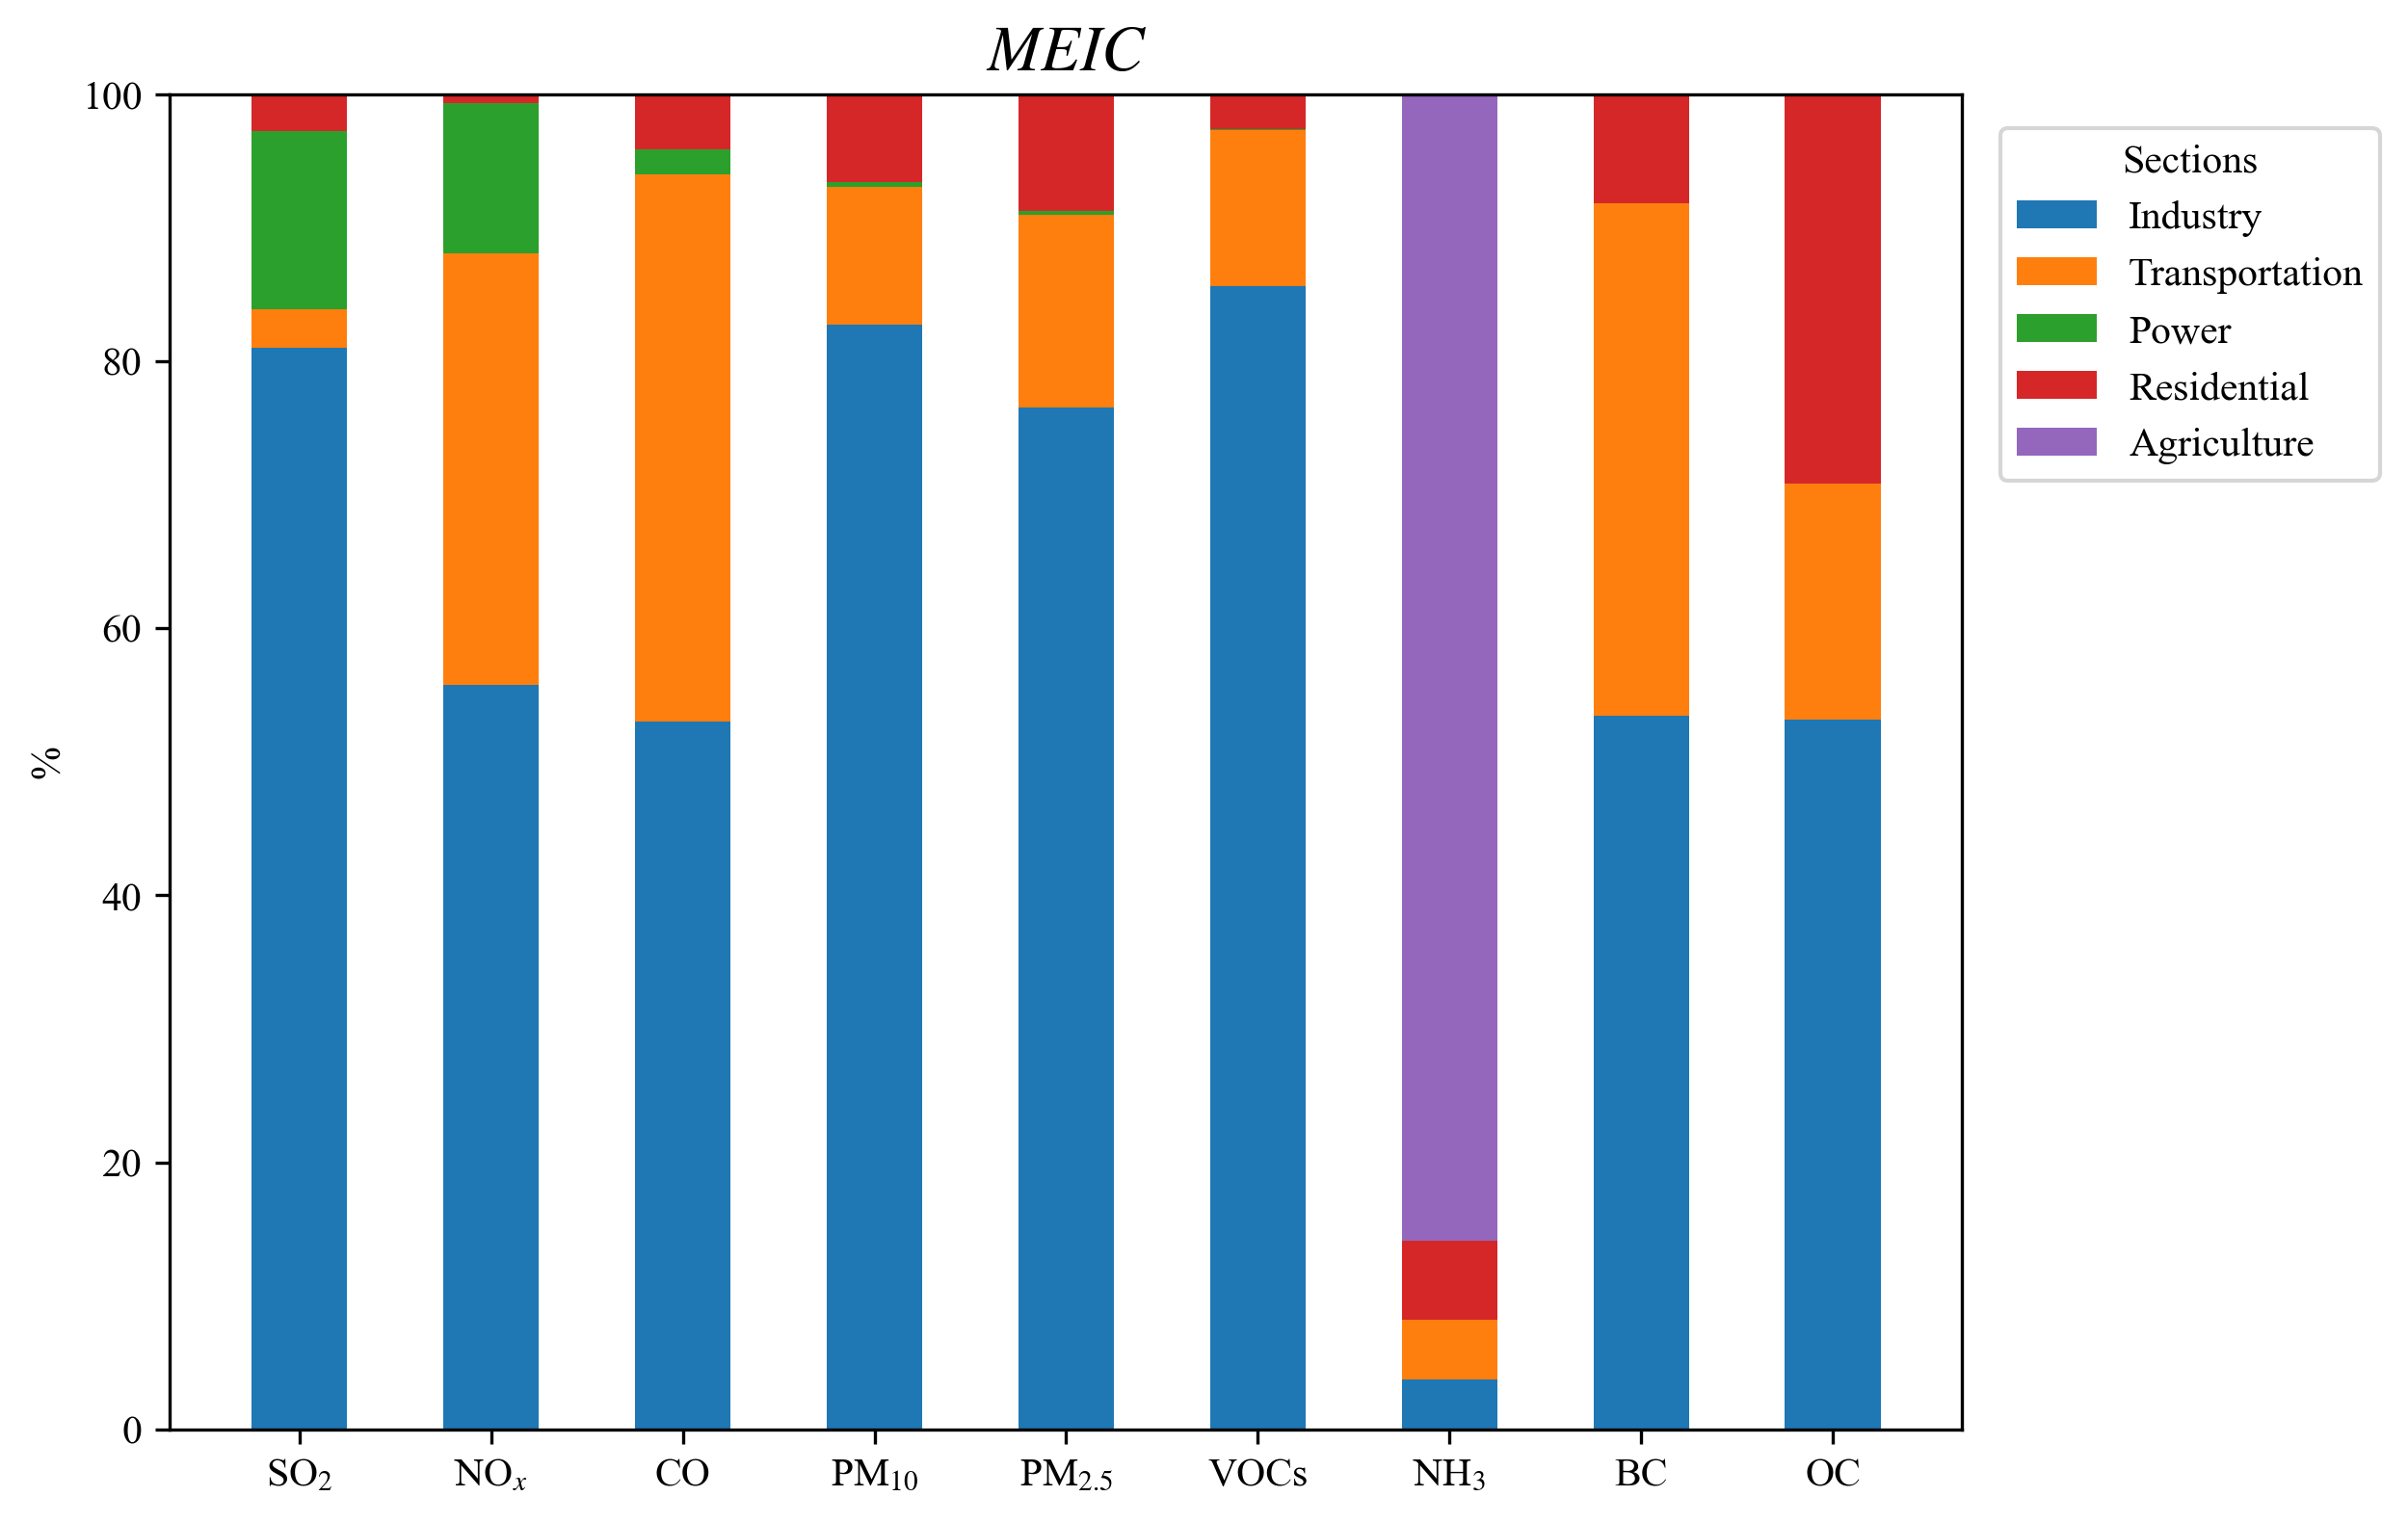

In [6]:
fig = plt.figure(figsize=(8, 6), dpi=300)
ax = fig.subplots(1, 1)

meicT = meic.T
meicT.index = ['SO$_2$','NO$_x$','CO','PM$_{10}$','PM$_{2.5}$','VOCs','NH$_3$','BC','OC']
meicT_copy = meicT.copy()

# Calculate the total sum for each category
total_sum = meicT_copy.sum(axis=1)

# Convert the values to percentage for each pollutant
for col in meicT_copy.columns:
    meicT_copy[col] = (meicT_copy[col] / total_sum) * 100

bottom = [0] * len(meicT.index)  # Initialize bottom

labels = ['Industry', 'Transportation', 'Power', 'Residential', 'Agriculture']

# Loop through each pollutant and plot the stacked bar chart
for i, col in enumerate(meicT_copy.columns):
    if bottom is None:
        ax.bar(meicT_copy.index, meicT_copy[col], width=0.5, label=labels[i], align='center', alpha=1)
        bottom = meicT_copy[col]
    else:
        ax.bar(meicT_copy.index, meicT_copy[col], width=0.5, bottom=bottom, label=labels[i], align='center', alpha=1)
        bottom += meicT_copy[col]

ax.legend(title='Sections',bbox_to_anchor=(1.01,0.99))
ax.set_ylabel('%')
ax.set_title('$MEIC$', size=16, weight='bold')
ax.set_ylim(0, 100)  # Set the y-axis range to 0-100 (%)
plt.show()
